# MobileSurvey Data (9/4/2015)

Data from phones and submitted to the server are combined and deduplicated for all 3 surveys

In [1]:
options(jupyter.plot_mimetypes = 'image/png')
library(proj4)
library(ggplot2)

## 1. Soil sample data check

### 1.1 Soil sample Data

In [2]:
recorded_data <- read.csv("../data/recorded_data.csv", stringsAsFactors=FALSE)
recorded_data <- recorded_data[recorded_data[,"X_gps_precision"]<5, ]
dim(recorded_data)

[1] 392  16

In [3]:
recorded_locs <- project(as.matrix(recorded_data[,c('X_gps_longitude', 'X_gps_latitude')]),'+proj=laea +lat_0=5 +lon_0=20 +ellps=WGS84 +units=m +no_defs')

#### presampled data

In [4]:
presampled_locs <- read.csv("../data/arusha_testsite_GID100m.csv", stringsAsFactors=FALSE)

### 1.2 Calculate 100m GID for each recorded locations

For each submitted data location, GID of the closest pre-sampled location within 100 meters is assigned as the GID.

In [5]:
laea_presampled_locs <- project(as.matrix(presampled_locs[,c("x","y")]),  '+proj=laea +lat_0=5 +lon_0=20 +ellps=WGS84 +units=m +no_defs')
GID_100m_record = rep(NA, dim(recorded_locs)[1])
for(i in 1:dim(recorded_locs)[1]){
    dist_topresampled <-  sqrt((laea_presampled_locs[,1] - recorded_locs[i,1])^2 + (laea_presampled_locs[,2] - recorded_locs[i,2])^2)
    if(min(dist_topresampled)<100){
        GID_100m_record[i] = presampled_locs[which.min(dist_topresampled),"GID_100m"]          
    }
}
table(GID_100m_record[recorded_data[,'depth']=='top'])


 E1837-S917-28  E1837-S917-79   E1837-S917-9   E1837-S918-4  E1837-S918-45 
             1              1              1              1              1 
  E1837-S918-5  E1837-S918-54  E1837-S918-63  E1837-S918-81  E1837-S924-10 
             1              1              2              1              1 
 E1837-S924-39  E1837-S924-40  E1837-S924-69  E1837-S924-80  E1837-S924-99 
             1              1              1              1              1 
 E1837-S925-43  E1837-S925-45  E1837-S925-52  E1837-S925-54  E1837-S925-56 
             1              1              1              1              1 
 E1837-S925-64  E1837-S925-66  E1837-S925-72  E1837-S925-91  E1838-S917-97 
             1              1              1              1              1 
 E1838-S918-95  E1838-S919-16  E1838-S919-17  E1838-S919-18  E1838-S919-36 
             1              5              5              5              5 
 E1838-S919-37  E1838-S919-58  E1838-S919-67  E1838-S920-14  E1838-S920-23 
           

#### problem: a sample location with more than 2 records

All 4 points here are very close to each other. Are they intended to be different sample locations? Or are there multiple entries only for training purposes?  If it is just due to training, then for those nearby points, did we actually only collect one sample bag?

In [6]:
dist(recorded_locs[GID_100m_record=="E1838-S919-18"&recorded_data[,'depth']=="top", ])

         1        2        3        4
2 3.287271                           
3 1.079870 2.815686                  
4 5.832969 4.800327 4.753101         
5 3.543466 3.799832 2.498440 2.481869

#### problem: locations with only one observation

Not all locations are depth restricted. For example, one sample is subsoil with no depth restriction, so the top soil sample at the same GID is missing.

In [16]:
lesssample_data=recorded_data[GID_100m_record%in%names(table(GID_100m_record))[table(GID_100m_record)<2],]

lesssample_data[lesssample_data$restrict=="no",]
GID_lessample <- GID_100m_record[GID_100m_record%in%names(table(GID_100m_record))[table(GID_100m_record)<2]&recorded_data$restrict=="no"]
write.csv(presampled_locs[presampled_locs$GID_100m%in%GID_lessample,], "onesampleonlydata.csv", row.names=FALSE)

,X_gps_altitude,X_gps_latitude,X_gps_longitude,X_gps_precision,X_submission_time,X_uuid,depth,deviceid,gps,lower,meta.instanceID,restrict,ssid,surveyor,today,upper
188,1193.571,-3.479706,36.61565,4,Soil sample_2015-08-20_11-41-40,d978d500-5853-4b39-8673-91198c4defc8,top,3.573591e+14,-3.479705554845325 36.6156475319103 1193.571466518444 4.0,,uuid:d978d500-5853-4b39-8673-91198c4defc8,no,AfSIS_TZ-O25n6sfg,Chris,2015-08-20,
225,1295.274,-3.452558,36.59135,4,Soil sample_2015-08-24_14-58-58,7847c131-7e74-4411-8068-e7ec4f838670,sub,3.573591e+14,-3.4525580762404684 36.59135272332993 1295.273563492719 4.0,,uuid:7847c131-7e74-4411-8068-e7ec4f838670,no,AfSIS_tz-xrcEz8Iu,Chris,2015-08-24,
353,1341.664,-3.418024,36.53662,4,2015-08-31T13:13:01,69a780cc-e6f3-4787-a8e1-bfebf5239dc9,top,3.593601e+14,-3.4180241453609277 36.53662111925086 1341.6642870537821 4.0,n/a,uuid:69a780cc-e6f3-4787-a8e1-bfebf5239dc9,no,AfSIS_tz-f99Ky4ic,Isaac,2015-08-31,n/a
383,1306.263,-3.440654,36.54655,4,2015-09-02T13:12:18,2f424ee1-5986-400d-94c2-89214cf3a2ad,top,3.573591e+14,-3.440654307783775 36.54654832027714 1306.2628426307374 4.0,n/a,uuid:2f424ee1-5986-400d-94c2-89214cf3a2ad,no,AfSIS_tz-3NPcdCH8,Chris,2015-09-02,n/a
384,1302.244,-3.441557,36.54562,4,2015-09-02T13:12:37,f94da357-709e-4931-aadb-7a8c0fd4fbc5,top,3.573591e+14,-3.441556839215245 36.54561894288989 1302.2444916692612 4.0,n/a,uuid:f94da357-709e-4931-aadb-7a8c0fd4fbc5,no,AfSIS_tz-U2JWzby9,Isaac,2015-09-02,n/a


#### problem: scatter plots of these problematic points

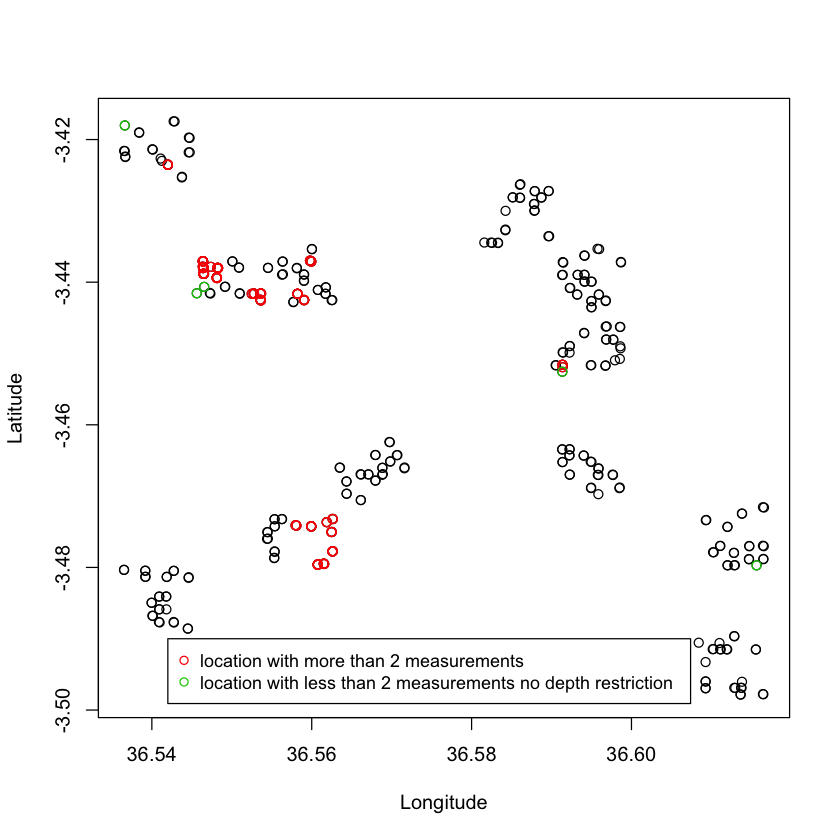

In [8]:
plot(recorded_data[,c('X_gps_longitude', 'X_gps_latitude')], xlab="Longitude", ylab="Latitude")
points(recorded_data[GID_100m_record%in%names(table(GID_100m_record))[table(GID_100m_record)>2],c('X_gps_longitude', 'X_gps_latitude')], col=2)
points(recorded_data[recorded_data$restrict=="no"&GID_100m_record%in%names(table(GID_100m_record))[table(GID_100m_record)<2],c('X_gps_longitude', 'X_gps_latitude')], col=3)
legend(36.542, -3.49, c("location with more than 2 measurements","location with less than 2 measurements no depth restriction"), cex=0.9,col=c(2, 3), pch=c(1,1))

### 1.3 Sampling progress

#### problem: GID for presampled locations which are not recorded

In [9]:
presampled_nonrecorded_GID <- presampled_locs[!presampled_locs[,"GID_100m"]%in%GID_100m_record, "GID_100m"]
presampled_nonrecorded_GID

[1] "E1839-S923-66"  "E1840-S922-100" "E1837-S917-47"  "E1837-S917-57" 
 [5] "E1837-S917-66"  "E1837-S917-29"  "E1844-S923-8"   "E1843-S922-36" 
 [9] "E1843-S923-33"  "E1842-S919-14"

### 1.4 SSID duplication: need a solution here

#### problem: duplicated SSID

Although it is possible for two SSID's to collide because they are randomly generated, the probability of this occurring is extremely low, especially for the long codes. Here I tried to find the SSID which were assigned to different grids, or different depths.

In [7]:
duplicated_ssid <- names(table(recorded_data$ssid))[table(recorded_data$ssid)>1]

duplicated_ssid_diffsample <- NULL
for(s in duplicated_ssid){
    if(dim(unique(cbind(GID_100m_record[recorded_data[,"ssid"]==s], recorded_data[recorded_data[,"ssid"]==s,'depth'])))[1]>1){
        duplicated_ssid_diffsample <- c(duplicated_ssid_diffsample, s)
    }
}
duplicated_ssid_diffsample

[1] "2007299d-694a-445b-b9b5-7a175323c0ac"
 [2] "2k8yeDKz"                            
 [3] "3f9e54b8-b77c-42c0-835e-915a21d818be"
 [4] "42bfd026-3cc9-4dfe-a393-e6c6db240904"
 [5] "46f778a2-2d63-47ba-916c-bfadc879f246"
 [6] "91dde520-3f1c-4fd5-b0af-1064e0c8f9bc"
 [7] "AfS_tz-0ueELP1g"                     
 [8] "AfS_tz-4JOkOlby"                     
 [9] "AfS_tz-6WWDol8c"                     
[10] "Afs_tz-9XnedOEi"                     
[11] "AfS_tz-Ea976ngC"                     
[12] "Afs_tz-ex75S1iG"                     
[13] "AfS_tz-GSij1vR6"                     
[14] "Afs_tz-gwwcivCC"                     
[15] "AfS_tz-JG2hpHaZ"                     
[16] "AfS_tz-tygpQ7nT"                     
[17] "Afs_tz-uWPCCdSs"                     
[18] "Afs_tz-VNqBoAD5"                     
[19] "AfS_tz-XWuWCO6f"                     
[20] "Afsi_tz-3i5oERGm"                    
[21] "Afsi_tz-4sjYrOxb"                    
[22] "Afsi_tz-971satTA"                    
[23] "Afsi_tz-aS1vxiJC"                    
[24] "Afsi_tz-CtS7zhaN"                    
[25] "Afsi_tz-fdMIukqU"                    
[26] "Afsi_tz-km9ftqCS"                    
[27] "Afsi_tz-KVJS1Z55"                    
[28] "Afsi_tz-MKz2ISgj"                    
[29] "Afsi_tz-qSM0UdaZ"                    
[30] "Afsi_tz-RyJqBjOC"                    
[31] "Afsi_tz-XUXJPcNP"                    
[32] "Afsi_tz-yrT5vk7o"                    
[33] "Afsi_tz-z7JFuwGD"                    
[34] "AfSIS_tz-rhhFM6Uw"                   
[35] "fa33e058-dbde-4895-9039-e27ddbf21438"
[36] "TZ-a9fqS6eG"                         
[37] "TZ-ixyrHkf0"                         
[38] "TZ-xb1O3oc3"                         
[39] "TZ-ZkRD71zT"

In [11]:
recorded_data[recorded_data$ssid==duplicated_ssid_diffsample[1], ]

,X_gps_altitude,X_gps_latitude,X_gps_longitude,X_gps_precision,X_submission_time,X_uuid,depth,deviceid,gps,lower,meta.instanceID,restrict,ssid,surveyor,today,upper
47,1301.661,-3.436979,36.55979,4,2 SSID_2015-07-24_13-27-24,c128c0b4-a40a-4a71-a66b-47eaa021334b,top,3.573591e+14,-3.436978900904974 36.55978547515811 1301.6605733991419 4.0,,uuid:c128c0b4-a40a-4a71-a66b-47eaa021334b,no,2007299d-694a-445b-b9b5-7a175323c0ac,Isaac,2015-07-24,
50,1311.537,-3.438844,36.54654,4,Soil sample_2015-07-29_12-52-47,8501649b-2528-4bdc-a159-71277a21dbab,sub,3.593601e+14,-3.4388437996132257 36.5465354152857 1311.5369644967166 4.0,,uuid:8501649b-2528-4bdc-a159-71277a21dbab,yes,2007299d-694a-445b-b9b5-7a175323c0ac,Swetha,2015-07-29,
254,1301.443,-3.438829,36.54647,4,2015-07-29T12:53:21,9cd37354-23c7-45ed-8c4d-23bee0efb2a9,sub,3.561281e+14,-3.4388286679791658 36.546469745935596 1301.4434924224688 4.0,n/a,uuid:9cd37354-23c7-45ed-8c4d-23bee0efb2a9,yes,2007299d-694a-445b-b9b5-7a175323c0ac,Kaswahili,2015-07-29,n/a
260,1305.828,-3.438817,36.54646,4,2015-07-29T12:54:04,6e1c60ad-98cd-43cb-88df-5b7bdebba273,sub,3.561281e+14,-3.438816781951359 36.54645692570397 1305.827523381923 4.0,n/a,uuid:6e1c60ad-98cd-43cb-88df-5b7bdebba273,yes,2007299d-694a-445b-b9b5-7a175323c0ac,Samuel,2015-07-29,n/a
275,1308.447,-3.438839,36.54646,4,2015-07-29T13:05:48,a1de0d68-b6f8-410e-9c8a-6aa2dadc7b89,sub,3.561281e+14,-3.4388388690814145 36.546461231594655 1308.4469765478802 4.0,n/a,uuid:a1de0d68-b6f8-410e-9c8a-6aa2dadc7b89,yes,2007299d-694a-445b-b9b5-7a175323c0ac,John,2015-07-29,n/a


#### GID with duplicated SSID

In [9]:
duplicatedSSID_GID <- GID_100m_record[recorded_data[,"ssid"]%in%duplicated_ssid_diffsample]
unique(duplicatedSSID_GID)
write.csv(presampled_locs[presampled_locs$GID_100m%in%duplicatedSSID_GID, ], "duplicatedSSIDdata.csv", row.names=FALSE)

[1] "E1837-S918-45"  "E1837-S918-4"   "E1839-S924-81"  "E1839-S919-68" 
 [5] "E1838-S919-16"  "E1838-S919-18"  "E1838-S919-17"  "E1838-S919-37" 
 [9] "E1839-S920-52"  "E1839-S920-32"  "E1839-S919-70"  "E1838-S920-83" 
[13] "E1838-S920-92"  "E1838-S920-93"  "E1839-S923-28"  "E1839-S924-6"  
[17] "E1839-S924-5"   "E1839-S924-13"  "E1840-S922-6"   "E1840-S923-14" 
[21] "E1840-S923-12"  "E1840-S923-31"  "E1840-S922-96"  "E1840-S922-88" 
[25] "E1840-S922-80"  "E1840-S922-58"  "E1840-S922-66"  "E1840-S922-77" 
[29] "E1840-S923-65"  "E1840-S923-35"  "E1840-S923-45"  "E1840-S923-54" 
[33] "E1837-S925-45"  "E1837-S925-54"  "E1843-S922-28"  "E1843-S922-29" 
[37] "E1843-S922-19"  "E1837-S924-99"  "E1837-S924-80"  "E1837-S924-69" 
[41] "E1837-S924-39"  "E1837-S924-40"  "E1837-S924-10"  "E1837-S925-43" 
[45] "E1837-S925-52"  "E1843-S922-48"  "E1845-S923-100" "E1843-S921-2"  
[49] "E1843-S920-33"

#### Dates with duplicated SSID

Some duplicated SSID were uploaded recently, which the tagging issue has been finalized

In [13]:
unique(recorded_data[recorded_data[,"ssid"]%in%duplicated_ssid_diffsample, 'today'])

[1] "2015-07-20" "2015-07-22" "2015-07-23" "2015-07-24" "2015-07-29"
 [6] "2015-07-30" "2015-07-31" "2015-08-10" "2015-08-12" "2015-08-13"
[11] "2015-08-14" "2015-08-17" "2015-08-18" "2015-08-21" "2015-08-24"
[16] "2015-08-25"

### 1.5 Sample location plot


a scatterplot of the locations of submitted soil samples

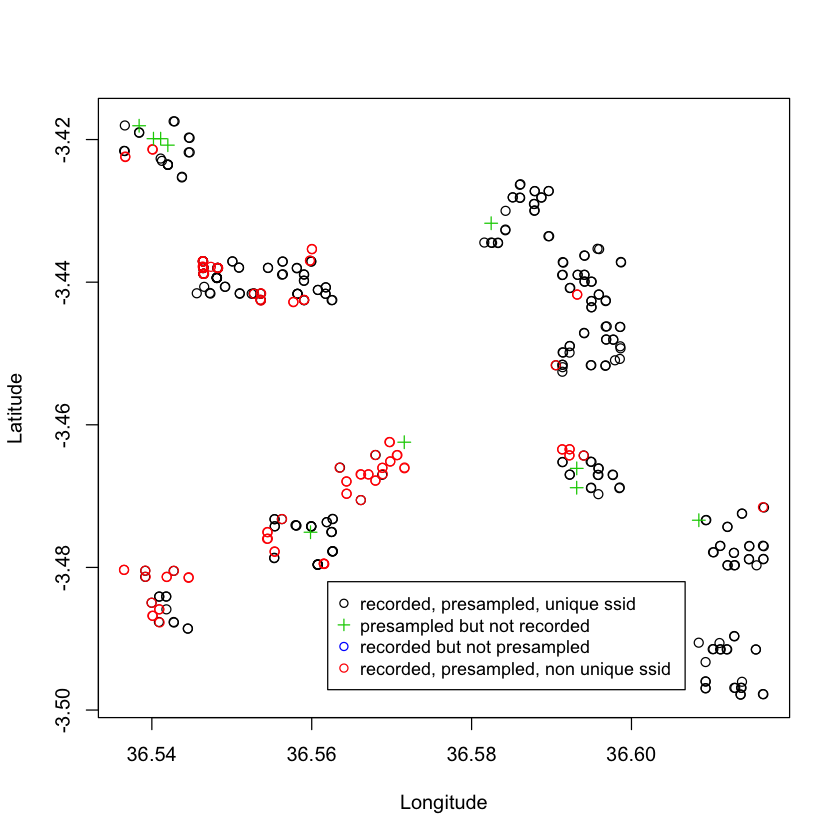

In [14]:

plot(recorded_data[!is.na(GID_100m_record)&!recorded_data[,"ssid"]%in%duplicated_ssid_diffsample,c('X_gps_longitude', 'X_gps_latitude')],col=1, xlim=range(recorded_data[,'X_gps_longitude']), ylim=range(recorded_data[,'X_gps_latitude']), xlab="Longitude", ylab="Latitude")
points(recorded_data[is.na(GID_100m_record),c('X_gps_longitude', 'X_gps_latitude')],col=4)
points(recorded_data[!is.na(GID_100m_record)&recorded_data[,"ssid"]%in%duplicated_ssid_diffsample,c('X_gps_longitude', 'X_gps_latitude')], col=2)
points(presampled_locs[!presampled_locs[,"GID_100m"]%in%GID_100m_record,c("x","y")], col=3, pch=3)
legend(36.562, -3.482,c("recorded, presampled, unique ssid", "presampled but not recorded", "recorded but not presampled", "recorded, presampled, non unique ssid"), cex=0.9, col=c(1,3, 4,2), pch=c(1,3,1,1))

## 2. Crop Scout and Cob Count: Checking which pre-sampled locations have been covered

In [15]:
crop_scout_data <- read.csv("../data/recorded_crop_scout_data.csv", stringsAsFactors=FALSE)
cob_count_data <- read.csv("../data/recorded_cob_count_data.csv", stringsAsFactors=FALSE)

In [16]:
laea_crop_scout_locs <- project(as.matrix(crop_scout_data[,c('X_gps_longitude', 'X_gps_latitude')]),'+proj=laea +lat_0=5 +lon_0=20 +ellps=WGS84 +units=m +no_defs')
laea_cob_counts_locs <- project(as.matrix(cob_count_data[,c('X_gps_longitude', 'X_gps_latitude')]),'+proj=laea +lat_0=5 +lon_0=20 +ellps=WGS84 +units=m +no_defs')


In [17]:
GID_100m_record_cropscout = rep(NA, dim(laea_crop_scout_locs)[1])
for(i in 1:dim(laea_crop_scout_locs)[1]){
    dist_topresampled <-  sqrt((laea_presampled_locs[,1] - laea_crop_scout_locs[i,1])^2 + (laea_presampled_locs[,2] - laea_crop_scout_locs[i,2])^2)
    if(min(dist_topresampled)<100){
        GID_100m_record_cropscout[i] = presampled_locs[which.min(dist_topresampled),"GID_100m"]          
    }
}

A plot of the locations shows that we have quite a few off-sample locations (submissions geographically far away from pre-sample locations).

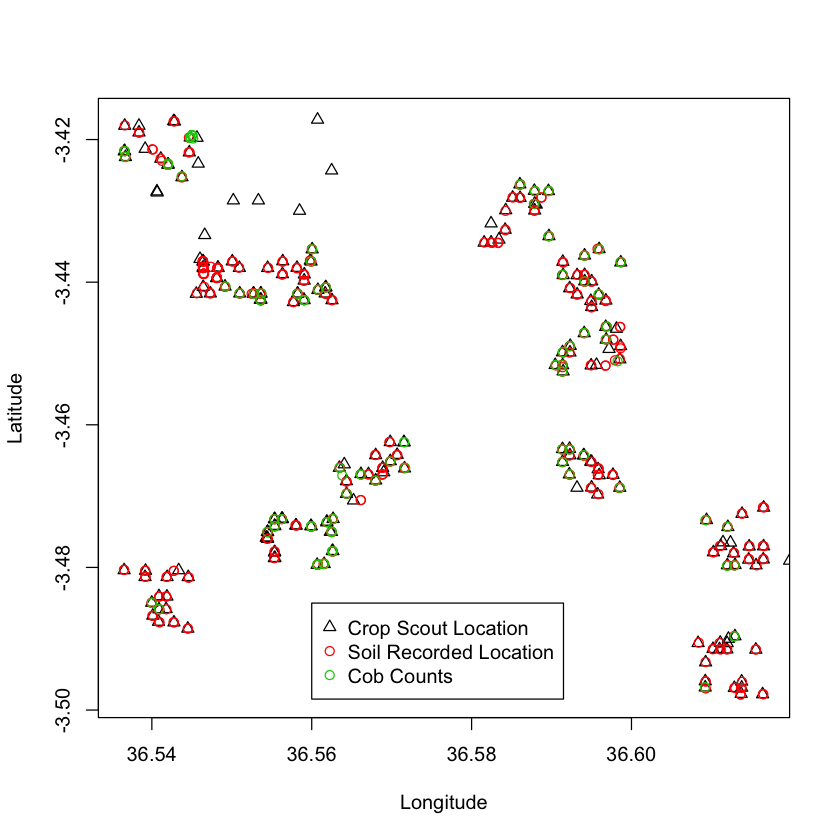

In [18]:
plot(crop_scout_data[,c('X_gps_longitude', 'X_gps_latitude')], pch=2, xlim=range(recorded_data[,c('X_gps_longitude')]), ylim=range(recorded_data[,c('X_gps_latitude')]), xlab="Longitude", ylab="Latitude")
points(recorded_data[,c('X_gps_longitude', 'X_gps_latitude')], col=2)
points(cob_count_data[,c('X_gps_longitude', 'X_gps_latitude')], col=3)
legend(36.56, -3.485, c("Crop Scout Location", "Soil Recorded Location", "Cob Counts"), col=c(1,2,3), pch=c(2,1,1))